In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/athletes.csv')

In [2]:
# if using git lfs, need to run `git lfs pull` if data is not already downloaded from lfs server
df.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:833faa1b49e71333722f1641f2d6c8474e9...
1,size 10968224


In [3]:
# Check types
df.dtypes

version https://git-lfs.github.com/spec/v1    object
dtype: object

In [4]:
# row counts
len(df)

2

# NAs in each column

In [5]:
# Count NaN values in each column
nan_counts = df.isna().sum()

nan_counts

version https://git-lfs.github.com/spec/v1    0
dtype: int64

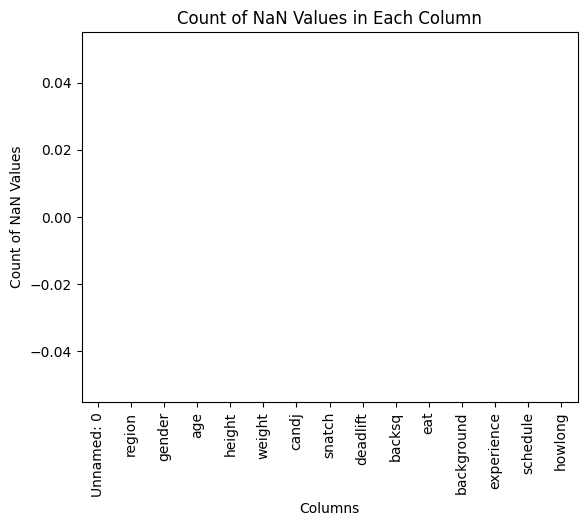

In [45]:
# Create a bar chart
nan_counts.plot(kind='bar')
plt.title('Count of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of NaN Values')
plt.show()

In [46]:
# category columns
cats = ['region','gender', 'eat', 'background', 'experience', 'schedule', 'howlong']

# numeric columns
numcs = ['age','height','weight','candj','snatch','deadlift','backsq']

# Category columns

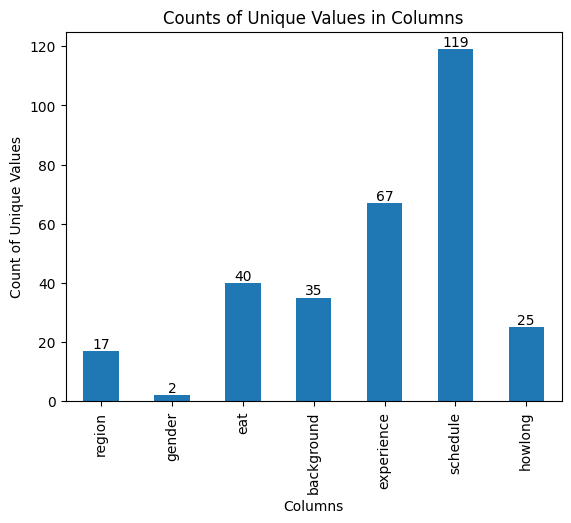

In [47]:
# Count unique values in certain categorical columns
unique_value_counts = df[cats].nunique()

# Create a bar chart
ax = unique_value_counts.plot(kind='bar')
plt.title('Counts of Unique Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')

# Display numbers on top of each bar
for i, v in enumerate(unique_value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

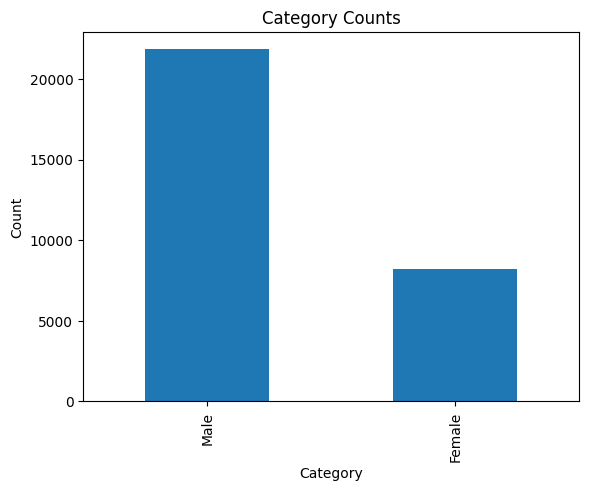

In [48]:
# gender
def category_counts(data,cat):
    # Count category occurrences
    category = data[cat].value_counts()

    # Create a bar chart for category counts
    category.plot(kind='bar')
    plt.title('Category Counts')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

category_counts(df,'gender')

# Numeric columns

In [49]:
df[numcs].describe().round(2)

,age,height,weight,candj,snatch,deadlift,backsq
count,30029.00,30029.00,30029.00,30029.00,30029.00,30029.00,30029.00
mean,32.12,68.87,177.13,205.42,156.17,361.93,294.12
std,7.44,3.77,32.40,58.69,48.83,96.75,85.08
min,18.00,52.00,5.00,1.00,1.00,0.00,1.00
25%,27.00,66.00,155.00,160.00,120.00,287.00,225.00
50%,31.00,69.00,178.00,205.00,155.00,375.00,300.00
75%,37.00,72.00,197.00,245.00,190.00,434.00,355.00
max,56.00,83.00,474.00,390.00,386.00,1000.00,882.00


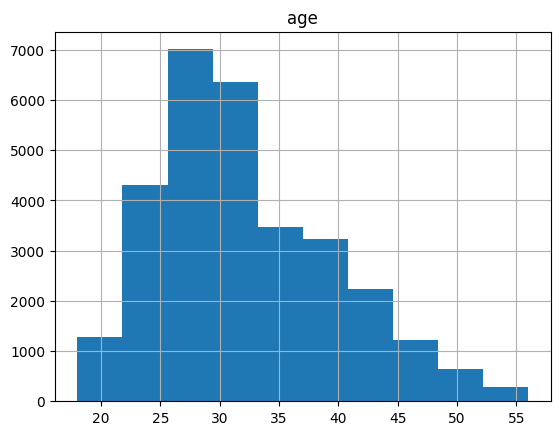

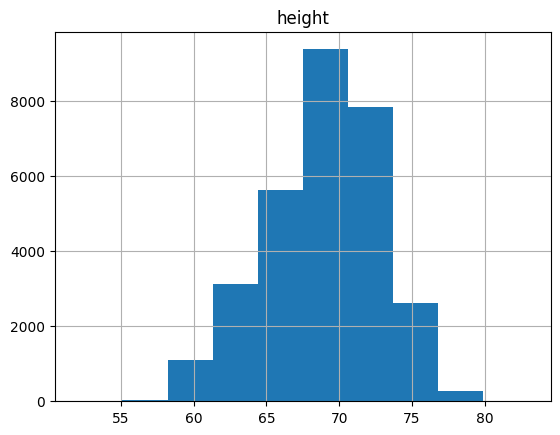

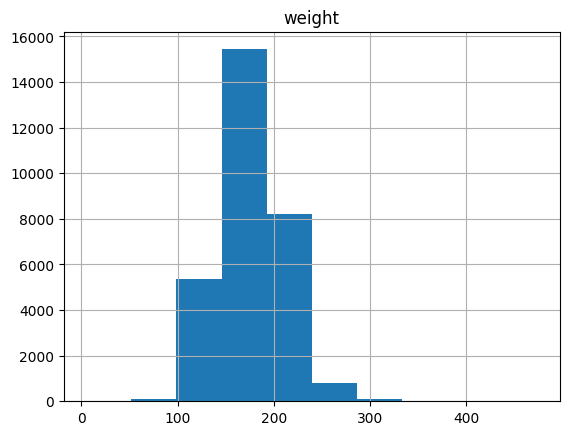

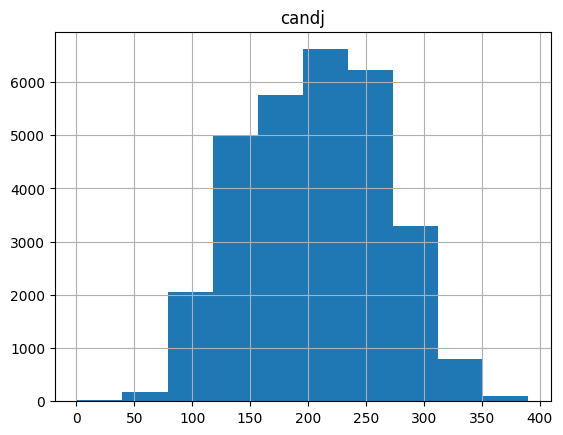

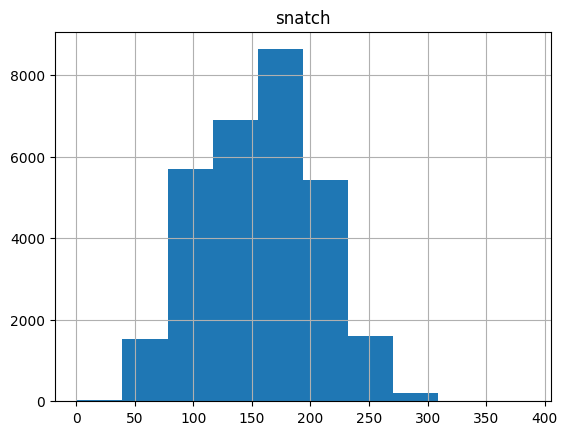

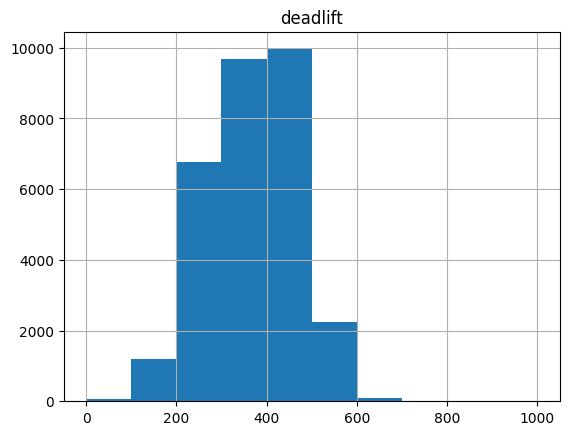

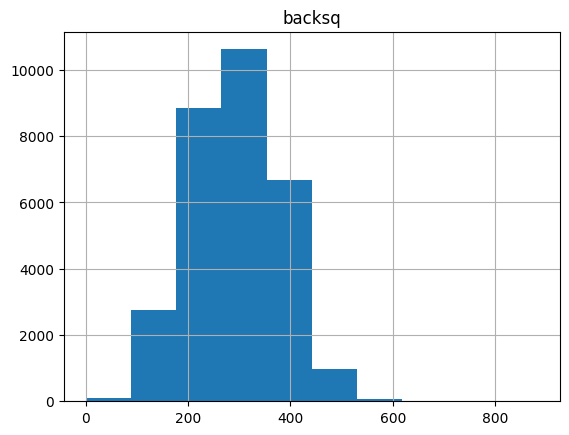

In [50]:
# Create histograms for multiple columns
for i in numcs:
    df.hist(column=i)

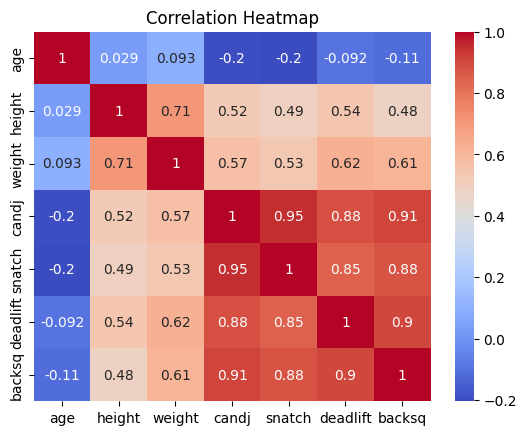

In [51]:
import seaborn as sns
corr_matrix = df[numcs].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()